<a href="https://colab.research.google.com/github/apinkymars/bootstrap-clone/blob/master/coba_OP_Grandline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [ ]:
zip_file_path = '/content/drive/MyDrive/Data.zip'
extracted_folder_path = 'extracted_files'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)

['Data']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_folder_path = os.path.join(extracted_folder_path, 'Data')
extracted_files = os.listdir(data_folder_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def read_and_concatenate_excel(files, folder_path):
    df_list = []
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)
        date = file.replace('Penjualan Tanggal ', '').replace(' Desember.xls', '')
        df['tanggal'] = f"2023-12-{date.zfill(2)}"
        df_list.append(df)
    concatenated_df = pd.concat(df_list, ignore_index=True)
    return concatenated_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
concatenated_dfs = []
for folder in extracted_files:
    folder_path = os.path.join(data_folder_path, folder)
    files_in_folder = os.listdir(folder_path)
    concatenated_dfs.append(read_and_concatenate_excel(files_in_folder, folder_path))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
final_concatenated_df = pd.concat(concatenated_dfs, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def clean_dataframe(df):
    df_cleaned = df.iloc[3:].reset_index(drop=True)
    df_cleaned.columns = df_cleaned.iloc[0]
    df_cleaned = df_cleaned.drop(0).reset_index(drop=True)
    return df_cleaned

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cleaned_final_df = clean_dataframe(final_concatenated_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cleaned_final_df.rename(columns={cleaned_final_df.columns[5]: 'tanggal'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cleaned_final_df['tanggal'] = cleaned_final_df['tanggal'].str.replace(' Desember .xls', '')
cleaned_final_df['tanggal'] = pd.to_datetime(cleaned_final_df['tanggal'], format='%Y-%m-%d')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cleaned_final_df.drop(columns=[cleaned_final_df.columns[-1]], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
file_path = '/content/drive/MyDrive/combined.xlsx'
df = pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No,Kode_Barang,Nama_Barang,Qty,Satuan,tanggal
0,1,127004,17.17 Roti Isi Buah,3,PCS,2023-12-02
1,2,3111512,222 Karet Gelang Warna 100 gr,4,PCS,2023-12-02
2,3,3111511,222 Karet Gelang Warna 500 gr,2,PCS,2023-12-02
3,4,8997028500549,58 Cuka Makan 135 ml,2,PCS,2023-12-02
4,5,8997028500143,58 Kecap Asin 135 ml,4,PCS,2023-12-02


In [ ]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No               0
Kode_Barang    150
Nama_Barang    120
Qty            150
Satuan         150
tanggal          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No             0
Kode_Barang    0
Nama_Barang    0
Qty            0
Satuan         0
tanggal        0
dtype: int64

In [ ]:
df = df[~df['Nama_Barang'].str.contains('telur', case=False, na=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
df = df.dropna(subset=['Qty'])
df = df[df['Qty'] >= 100]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-503eab436b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


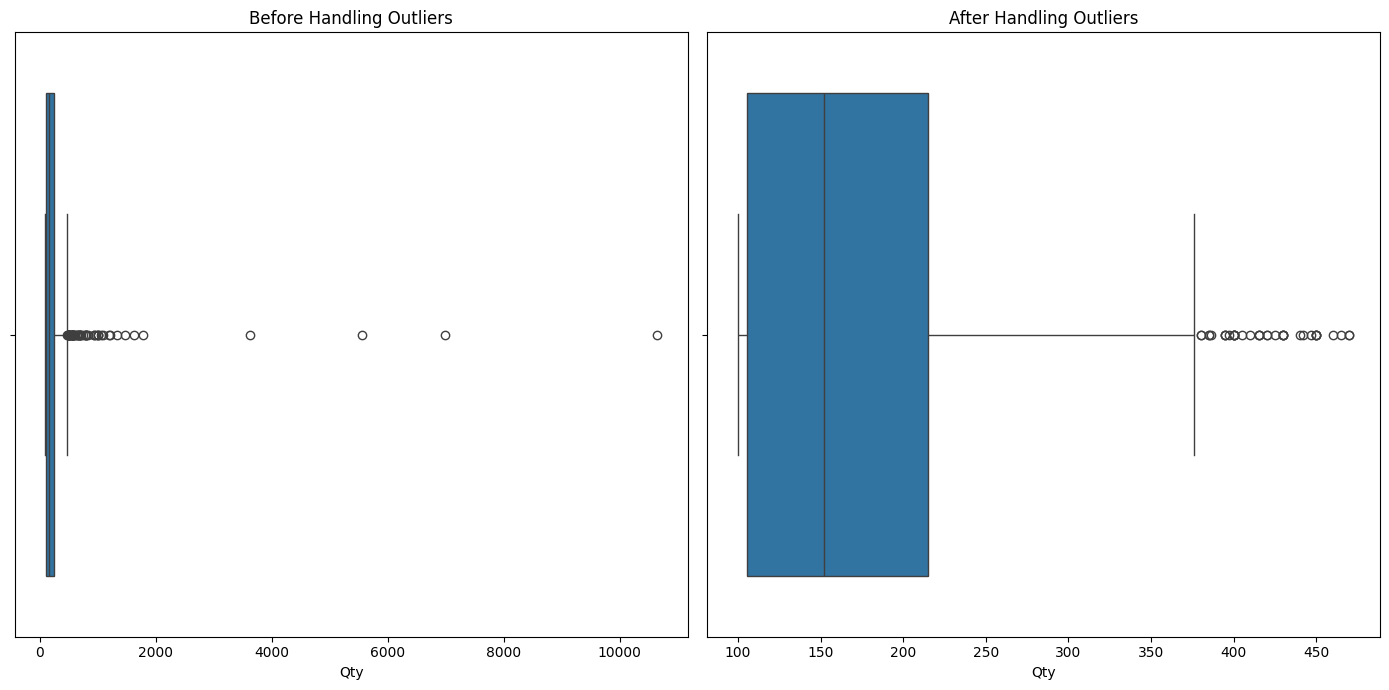

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

Q1 = df['Qty'].quantile(0.25)
Q3 = df['Qty'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Qty'] < lower_bound) | (df['Qty'] > upper_bound)]

df_no_outliers = df[~((df['Qty'] < lower_bound) | (df['Qty'] > upper_bound))]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Qty'])
plt.title('Before Handling Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['Qty'])
plt.title('After Handling Outliers')

plt.tight_layout()
plt.show()

In [ ]:
df = df_no_outliers
df.sort_values('Qty')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No,Kode_Barang,Nama_Barang,Qty,Satuan,tanggal
94427,94428,31115457,SP Dus Putih NXB 350 GSM,100.0,PCS,2023-12-14
19166,19167,34156306421321,Double Donut Oval Mika Warna,100.0,PCS,2023-12-07
56466,56467,3111443,Hansel Dus Polos GS R10K 350 GSM,100.0,PCS,2023-12-29
19196,19197,15454131,Dus Kraft Roti Bakar Laminasi,100.0,PCS,2023-12-07
19198,19199,3113013,Dus Polos NE R10K 350,100.0,PCS,2023-12-07
...,...,...,...,...,...,...
93277,93278,311656,Lancar Dus R5 Kraf 275 GSM,450.0,PCS,2023-12-14
1519,1520,311464,Lancar Dus Duplek R3 BA Polos 310 GSM,460.0,PCS,2023-12-02
19845,19846,311656,Lancar Dus R5 Kraf 275 GSM,465.0,PCS,2023-12-07
10803,10804,3111650,Lancar Dus Duplek R10K Polos 350 GSM,470.0,PCS,2023-12-06


In [ ]:
basket = df.groupby(['tanggal', 'Nama_Barang']).size().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket = basket.sample(frac=1, random_state=42)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-df405dfd0e87>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Nama_Barang,Adabi Bumbu Perencah Tom Yam 40 gr,Aoka Roti Sandwich Stroberi 65 gr,BES 520 Ecer,Bawang Bombay,Blue Band Serbaguna 200 gr,Botol Almond 250 ml,Botol Cabe 200 ml,Botol Cantik 350 ml,Botol Juice 500 ml,Botol Sehat 330 ml,...,Sedap Mantap Dus Pizza GS Uk 25x25,Sedap Mantap Dus Roti Bakar Uk 20x9 cm,Sonne Dus Coklat Premium Monstera Uk 20x20x7,Sonne Dus Coklat Uk 18x18,Sonne Dus Coklat Uk 20x20,Sonne Dus Coklat Uk 22x22,Tas Kertas Polos Uk 20x25 1 Lusin,Tip Top Kulit Lumpia 450 gr Isi 50,Tutup Botol,Wincheez Keju 250 gr
tanggal,,,,,,,,,,,,,,,,,,,,,
2023-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-16,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2023-12-25,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-18,0,0,1,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2023-12-09,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2023-12-10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2023-12-30,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-13,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets_apriori = apriori(basket, min_support=0.9s, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets_apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,1.000000,(Gula Pasir 1 kg)
1,0.966667,(Indomie Goreng 85 gr)
2,0.900000,(Roti Bakar)
3,0.966667,"(Gula Pasir 1 kg, Indomie Goreng 85 gr)"
4,0.900000,"(Roti Bakar, Gula Pasir 1 kg)"


In [ ]:
#nyimpen hasil di drive
frequent_itemsets_apriori.to_excel('/content/drive/MyDrive/hasil_freq_apriori09.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_apriori.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gula Pasir 1 kg),(Indomie Goreng 85 gr),1.000000,0.966667,0.966667,0.966667,1.0,0.0,1.0,0.0
1,(Indomie Goreng 85 gr),(Gula Pasir 1 kg),0.966667,1.000000,0.966667,1.000000,1.0,0.0,inf,0.0
2,(Roti Bakar),(Gula Pasir 1 kg),0.900000,1.000000,0.900000,1.000000,1.0,0.0,inf,0.0
3,(Gula Pasir 1 kg),(Roti Bakar),1.000000,0.900000,0.900000,0.900000,1.0,0.0,1.0,0.0


In [ ]:
#nyimpen hasil di drive
rules_apriori.to_excel('/content/drive/MyDrive/hasil_rules_apriori09.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.9, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets_fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,1.000000,(Gula Pasir 1 kg)
1,0.966667,(Indomie Goreng 85 gr)
2,0.900000,(Roti Bakar)
3,0.966667,"(Gula Pasir 1 kg, Indomie Goreng 85 gr)"
4,0.900000,"(Roti Bakar, Gula Pasir 1 kg)"


In [ ]:
#nyimpen hasil di drive
frequent_itemsets_fpgrowth.to_excel('/content/drive/MyDrive/hasil_freq_fpgrowth09.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_fpgrowth.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gula Pasir 1 kg),(Indomie Goreng 85 gr),1.000000,0.966667,0.966667,0.966667,1.0,0.0,1.0,0.0
1,(Indomie Goreng 85 gr),(Gula Pasir 1 kg),0.966667,1.000000,0.966667,1.000000,1.0,0.0,inf,0.0
2,(Roti Bakar),(Gula Pasir 1 kg),0.900000,1.000000,0.900000,1.000000,1.0,0.0,inf,0.0
3,(Gula Pasir 1 kg),(Roti Bakar),1.000000,0.900000,0.900000,0.900000,1.0,0.0,1.0,0.0


In [ ]:
#nyimpen hasil di drive
rules_fpgrowth.to_excel('/content/drive/MyDrive/hasil_rules_fpgrowth09.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
